In this notebook we analyze the effect that the liquidation cost $b$ has on the final inventory. We expect to see an inverse relationship. More especifically, we expect a decreasing and convex relationship:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from methods import *

In [ ]:
# Global simulation parameters
q_max = 6
T = 300.0
N = 500
dt = T / N

# Baseline model parameters
A = 0.1
k = 0.3
gamma = 0.05
mu = 0.0
sigma = 0.3

# Derived baseline parameters
alpha = 0.5 * k * gamma * sigma**2
beta = k * mu
eta = A * (1 + gamma/k)**(-(1 + k/gamma))

In [ ]:
# Define a range of liquidation cost b using logarithmic spacing
b_values = np.logspace(-1.5, 2, num=20)

# Simulation settings for trading paths
M = 100000
q_init = 6
S_init = 100.0

# We'll store the trading curves and final average inventory for each b
trading_curves = {}
final_inventory = []

for b_val in b_values:
    # Compute the optimal quotes using the current b
    quotes = compute_optimal_quote(q_max, N, k, b_val, alpha, beta, gamma, eta, dt)
    # Simulate trading paths with this quotes array
    q_paths, S_paths, X_paths = simulate_trading_paths(M, N, dt, q_init, S_init, mu, sigma, k, gamma, quotes, A, b_val)
    # Compute average inventory at each time
    avg_q = np.mean(q_paths, axis=1)
    trading_curves[b_val] = avg_q
    final_inventory.append(avg_q[-1])


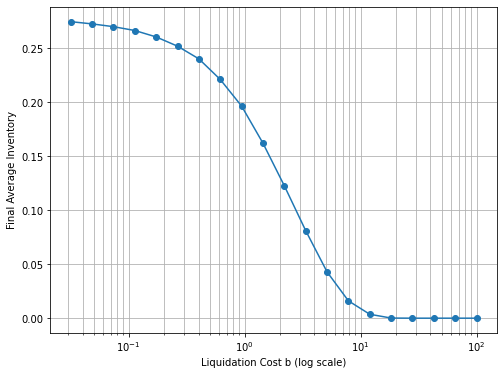

In [ ]:
# Plot final average inventory vs. b on a logarithmic x-axis
plt.figure(figsize=(8,6))
plt.semilogx(b_values, final_inventory, marker='o', linestyle='-')
plt.xlabel("Liquidation Cost b (log scale)")
plt.ylabel("Final Average Inventory")
# plt.title("Final Average Inventory vs. Liquidation Cost b")
plt.grid(True, which='both')
plt.savefig("./Figures/final_inventory_vs_b.png")